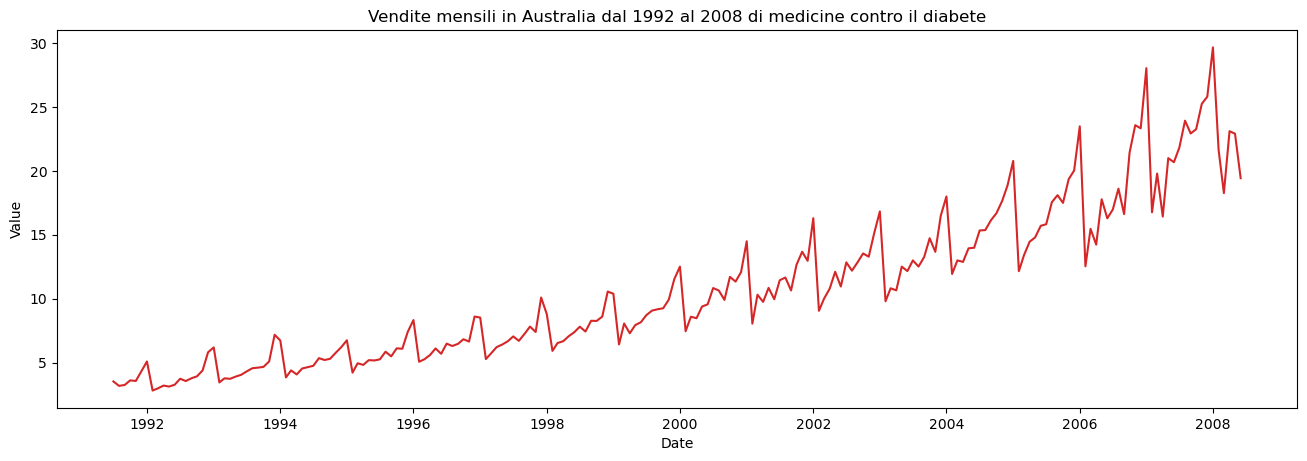

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    figura = plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    figura.savefig('plot_df.png')

plot_df(df, x=df.index, y=df.value, title='Vendite mensili in Australia dal 1992 al 2008 di medicine contro il diabete') 

In [16]:
df.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


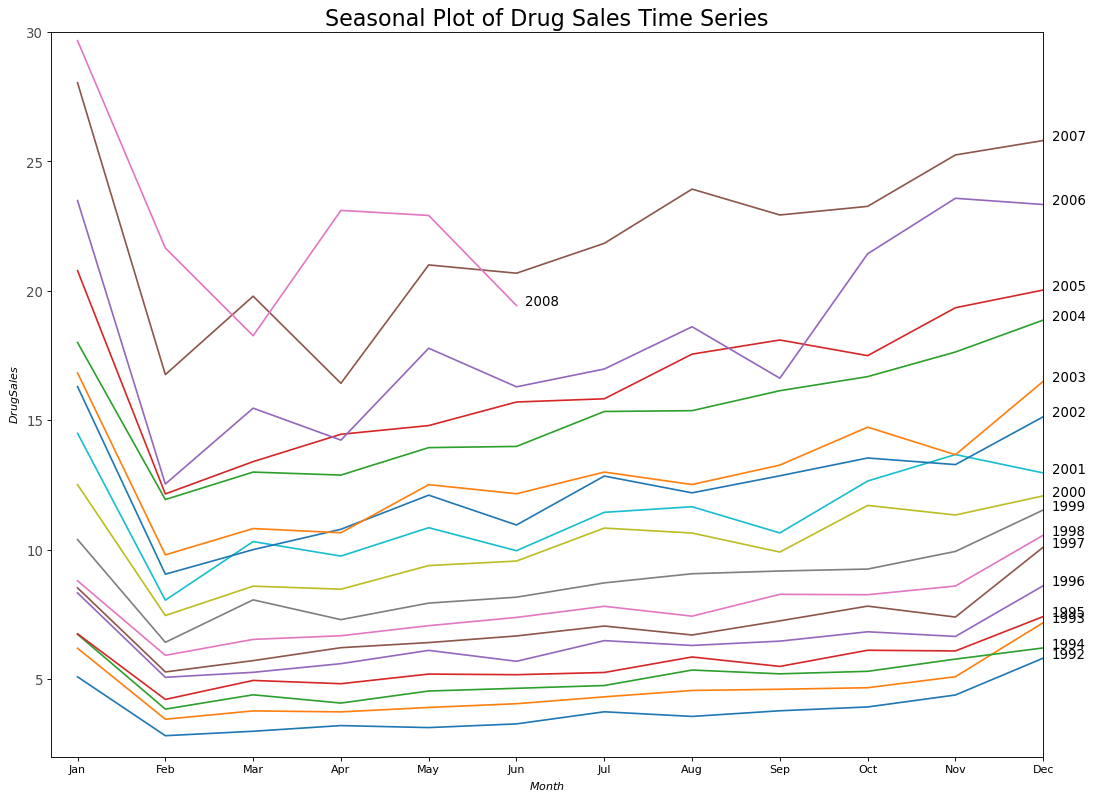

In [2]:
df.reset_index(inplace=True)

df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

figura2 = plt.figure(figsize=(16,12), dpi= 80)
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', 'value', data=df.loc[df.year==y, :], label=y)
        plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'value'][-1:].values[0], y, fontsize=12)

plt.gca().set(xlim=(-0.3, 11), ylim=(2, 30), ylabel='$Drug Sales$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of Drug Sales Time Series", fontsize=20)
plt.show()
figura2.savefig('plot_df2.png')

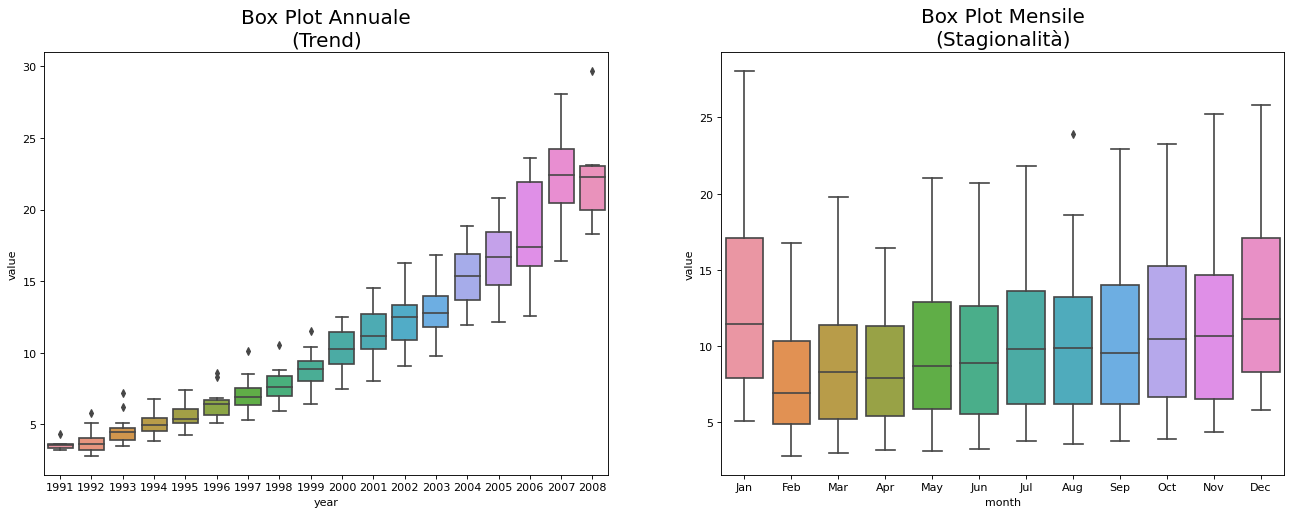

In [3]:
import seaborn as sns
figura3, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='value', data=df, ax=axes[0])
sns.boxplot(x='month', y='value', data=df.loc[~df.year.isin([1991, 2008]), :])

axes[0].set_title('Box Plot Annuale\n(Trend)', fontsize=18); 
axes[1].set_title('Box Plot Mensile\n(Stagionalità)', fontsize=18)
plt.show()
figura3.savefig('plot_df3.png')

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

df.set_index('date', inplace=True)

In [5]:
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')

result_add = seasonal_decompose(df['value'], model='additive', extrapolate_trend='freq')

In [6]:
def plotseasonal(res, axes, title ):
    res.observed.plot(ax=axes[0], legend=False)
    axes[0].set_ylabel('Osservato')
    res.trend.plot(ax=axes[1], legend=False)
    axes[0].set_title(title, fontsize=18)
    axes[1].set_ylabel('Trend')
    res.seasonal.plot(ax=axes[2], legend=False)
    axes[2].set_ylabel('Stagionalità')
    res.resid.plot(ax=axes[3], legend=False)
    axes[3].set_ylabel('Residuo')

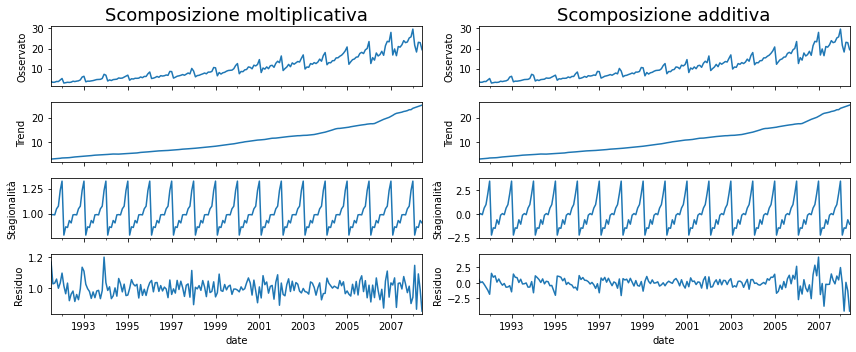

In [7]:
figura4, axes = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(12,5))
plotseasonal(result_mul, axes[:,0],'Scomposizione moltiplicativa')
plotseasonal(result_add, axes[:,1],'Scomposizione additiva')

plt.tight_layout()
plt.show()
figura4.savefig('plot_df4.png')

In [9]:
reconst= pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)
reconst.columns = ['seasonal', 'trend', 'residual', 'actual_values']
reconst.head()

,seasonal,trend,residual,actual_values
date,,,,
1991-07-01,0.987845,3.060085,1.166629,3.526591
1991-08-01,0.990481,3.124765,1.027745,3.180891
1991-09-01,0.987476,3.189445,1.032615,3.252221
1991-10-01,1.048329,3.254125,1.058513,3.611003
1991-11-01,1.074527,3.318805,0.999923,3.565869


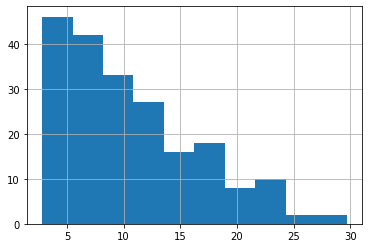

In [14]:
df['value'].hist()
plt.show()

In [8]:
from statsmodels.tsa.stattools import adfuller, kpss

# ADF Test
result = adfuller(df.value.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(df.value.values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -2.654993187821175
p-value: 0.0821554135054533
Critial Values:
   1%, -3.462980134086401
Critial Values:
   5%, -2.875885461947131
Critial Values:
   10%, -2.5744164898444515

KPSS Statistic: 1.313675
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


c:\users\s.andreozzi\appdata\local\programs\python\python38\lib\site-packages\numpy\linalg\linalg.py:1872: RuntimeWarning: invalid value encountered in greater
  return count_nonzero(S > tol, axis=-1)
c:\users\s.andreozzi\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
c:\users\s.andreozzi\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)
